In [ ]:
#함수형 API모델

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

inputs = Input(shape=(224,224,3))  #함수형 API는 input층을 통해 입력값의 형태를 정의해주어야 함.
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPooling2D(strides=2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=x)

# MNIST에 함수형 API 활용하기

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

x_train = (x_train.reshape(-1,28,28,1))/255
x_val = (x_val.reshape(-1,28,28,1))/255
x_test = (x_test.reshape(-1,28,28,1))//255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
inputs = Input(shape=(28,28,1))
x = Conv2D(32, (3,3), activation='relu')(inputs)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPooling2D(strides=2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val), epochs=10)

Epoch 1/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.7315 - acc: 0.3623 - val_loss: 1.4561 - val_acc: 0.4744
Epoch 2/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.3112 - acc: 0.5414 - val_loss: 1.2244 - val_acc: 0.5765
Epoch 3/10
1313/1313 [==============================] - 9s 7ms/step - loss: 1.1037 - acc: 0.6383 - val_loss: 1.0072 - val_acc: 0.6838
Epoch 4/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.9426 - acc: 0.7057 - val_loss: 0.8655 - val_acc: 0.7409
Epoch 5/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.8210 - acc: 0.7483 - val_loss: 0.7904 - val_acc: 0.7533
Epoch 6/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.7319 - acc: 0.7776 - val_loss: 0.6860 - val_acc: 0.7901
Epoch 7/10
1313/1313 [==============================] - 9s 7ms/step - loss: 0.6638 - acc: 0.7967 - val_loss: 0.6302 - val_acc: 0.8128
Epoch 8/10
1313/1313 [==============================] - 9s 7ms

In [ ]:
import numpy as np

#햄버거 이미지
hamburger_img = np.random.random((1000,28,28,1))
#햄버거에 대한 평가
customer_form = np.random.randint(10000, size=(1000,100))
#햄버거에 대한 평점
hamburger_rate = np.round(np.random.random(1000,)*5,1)
#햄버거에 추가되어질 50가지의 재료
update_for_hamburger = np.random.randint(50, size=(1000,))

print(hamburger_img.shape, customer_form.shape)
print(hamburger_rate.shape, update_for_hamburger.shape)

(1000, 28, 28, 1) (1000, 100)
(1000,) (1000,)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Dense, Concatenate

#입력 형태 명시
img_input = Input(shape=(28,28,1), name='hamburger_img')
form_input = Input(shape=(None,), name='customer_form')

#햄버거 이미지 입력
x_1 = Conv2D(32, (3,3), activation='relu')(img_input)
x_1 = Conv2D(32, (3,3), activation='relu')(x_1)
x_1 = MaxPooling2D(strides=2)(x_1)
x_1 = GlobalAveragePooling2D()(x_1)

#햄버거 평가 입력
x_2 = Embedding(10000, 64)(form_input)
x_2 = LSTM(128)(x_2)

#Concatenate : 텐서를 병합할 때 사용.
#출력을 만들기 위해 모든 입력을 하나의 텐서로 합침
x = Concatenate()([x_1,x_2])

#햄버거 평가 출력값
rate_pred = Dense(1, name='hamburger_rate')(x)
#50가지 재료 출력값
update_pred = Dense(50, activation='softmax', name='update_for_hamburger')(x)

model = Model(inputs = [img_input, form_input],
              outputs = [rate_pred, update_pred])

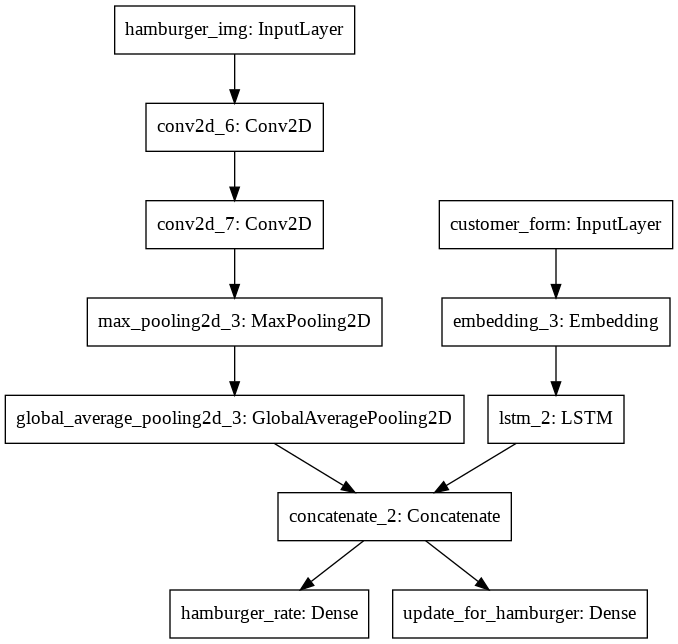

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
hamburger_img (InputLayer)      [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 26, 26, 32)   320         hamburger_img[0][0]              
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 24, 24, 32)   9248        conv2d_6[0][0]                   
__________________________________________________________________________________________________
customer_form (InputLayer)      [(None, None)]       0                                            
_______________________________________________________________________________________

In [ ]:
model.compile(optimizer = 'adam', loss = ['mse', 'sparse_categorical_crossentropy'],
              metrics = {'hamburger_rate':'mse', 'update_for_hamburger':'acc'})  #해당 층의 이름에 맞춰서

model.fit([hamburger_img, customer_form], [hamburger_rate, update_for_hamburger], epochs=2, batch_size=32)



Epoch 1/2
32/32 [==============================] - 5s 152ms/step - loss: 7.1836 - hamburger_rate_loss: 3.2396 - update_for_hamburger_loss: 3.9439 - hamburger_rate_mse: 3.2396 - update_for_hamburger_acc: 0.0250
Epoch 2/2
32/32 [==============================] - 5s 149ms/step - loss: 5.7836 - hamburger_rate_loss: 1.8742 - update_for_hamburger_loss: 3.9095 - hamburger_rate_mse: 1.8742 - update_for_hamburger_acc: 0.0270


# 잔차연결

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Add
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

#use_transform : MaxPooling을 통해 입력값의 크기에 변환을 주는 인자
def residual_block(inputs, num_channels, use_transform=False):
  x = Conv2D(num_channels, (3,3), activation='relu', padding='same')(inputs)
  x = Conv2D(num_channels, (3,3), padding='same')(x)

  #입력값의 형태가 변환되는 경우, 1x1 컨볼루션을 통해 형태 조절
  if use_transform:
    x = MaxPooling2D(strides=2)(x)
    inputs = Conv2D(num_channels, (1,1), strides=2, padding='same')(inputs)

  #입력값과 변환된 입력값을 더함
  add_x = Add()([inputs, x])

  return Activation('relu')(add_x)

inputs = Input(shape=(28,28,1))

x = residual_block(inputs, 32, use_transform=True)
x = residual_block(x,32)
x = residual_block(x, 32, use_transform=True)

x = GlobalAveragePooling2D()(x)
x = Dense(10, activation='softmax')(x)

model=Model(inputs=inputs, outputs=x)

In [ ]:
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 28, 28, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 28, 28, 32)   9248        conv2d_8[0][0]                   
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 14, 14, 32)   64          input_2[0][0]                    
_______________________________________________________________________________________

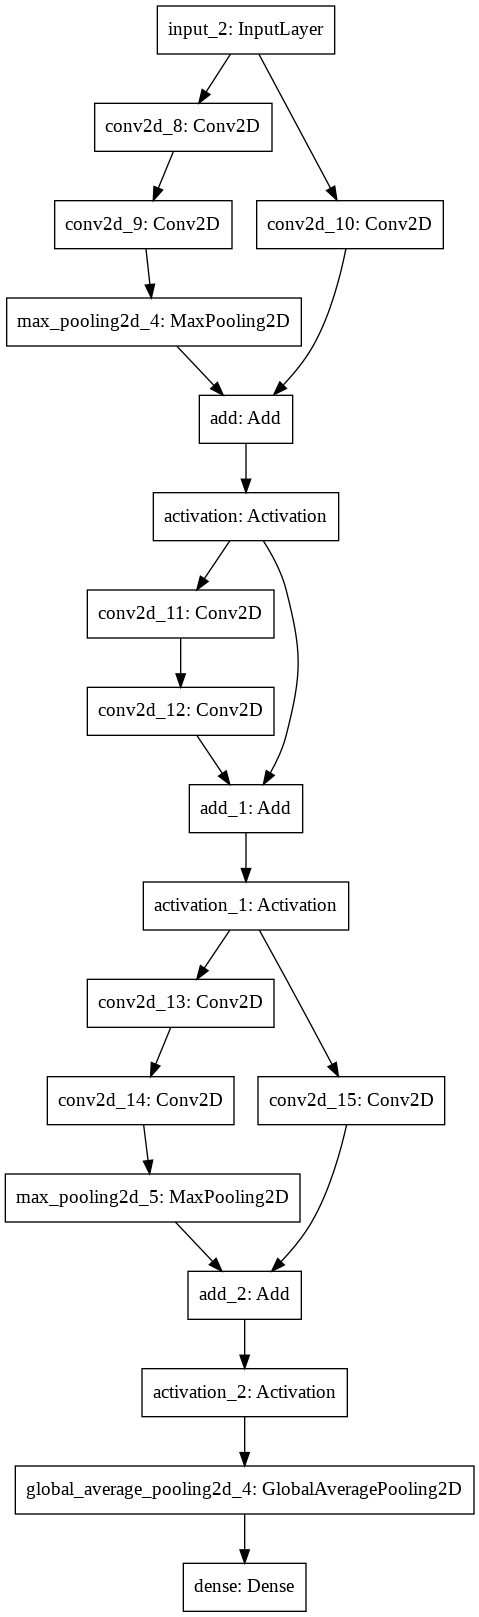

In [ ]:
plot_model(model)

# 인셉션 모듈

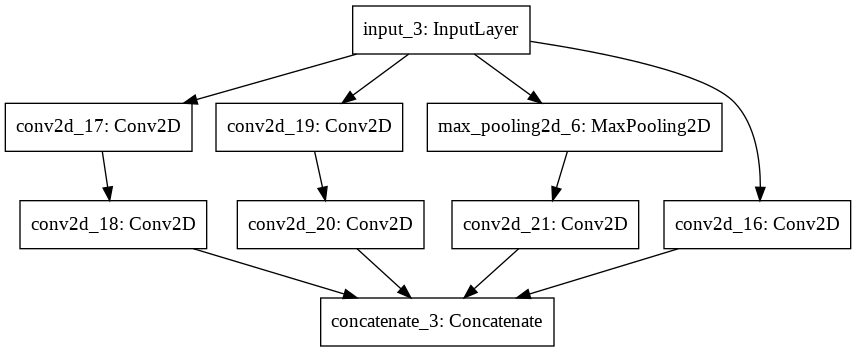

In [ ]:
def inception_module(x):
  x_1 = Conv2D(32, (1,1), activation='relu')(x)
  
  x_2 = Conv2D(48, (1,1), activation='relu')(x)
  x_2 = Conv2D(64, (3,3), activation='relu', padding='same')(x_2)

  x_3 = Conv2D(16, (1,1), activation='relu')(x)
  x_3 = Conv2D(16, (5,5), activation='relu', padding='same')(x_3)

  x_4 = MaxPooling2D(pool_size=(3,3), strides=1, padding='same')(x)
  x_4 = Conv2D(32, (1,1), activation='relu')(x_4)

  output = Concatenate()([x_1, x_2, x_3, x_4])

  return output

inputs = Input(shape=(224,224,3))
x = inception_module(inputs)

model = Model(inputs=inputs, outputs=x)

plot_model(model)

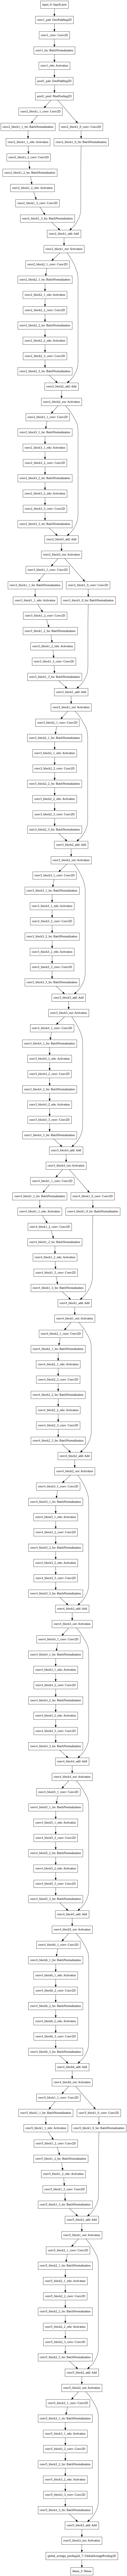

In [ ]:
#ResNet 활용하여 모델 구성하기

from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
def get_model(num_classes):
  #inception_v3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(32,32,3))
  resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32,3))
  x = GlobalAveragePooling2D()(resnet.output)
  x = Dense(num_classes, activation='softmax')(x)

  model = Model(inputs = resnet.input, outputs=x)

  return model

model = get_model(10)
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

plot_model(model)

# 텐서플로우 허브

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

img_shape = x_train.shape[1:]

170500096/170498071 [==============================] - 4s 0us/step
(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


In [ ]:
# url통해 텐서플로우 허브에서 제공하는 모델 불러오기

import tensorflow as tf
import tensorflow_hub as hub

model_url = "https://tfhub.dev/google/efficientnet/b0/classification/1"
hub_layer = hub.KerasLayer(model_url, trainable=False)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

model = Sequential([hub_layer, Dense(10, activation='softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', metrics=['acc'], optimizer='adam')

model.build((None,) + img_shape)


In [ ]:
img_shape

(32, 32, 3)

In [ ]:
model.fit(x_train, y_train, epochs=1, batch_size=32, validation_data=(x_val, y_val))

1094/1094 [==============================] - 12s 11ms/step - loss: 2.2635 - acc: 0.2045 - val_loss: 2.2166 - val_acc: 0.2147


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class DataGenerator(tf.keras.utils.Sequence):
  def __init__(self, df, batch_size=32, target_size=(112,112), shuffle=True):
    self.len_df = len(df)
    self.batch_size=batch_size
    self.target_size=target_size
    self.shuffle=shuffle
    self.class_col = ['black', 'blue','brown','green','red','white','dress','shirt','pants','shorts','shoes']

    self.generator = ImageDataGenerator(rescale=1./255)
    self.df_generator = self.generator.flow_from_dataframe(dataframe=df, directory='', x_col='image',y_col=self.class_col, target_size=self.target_size,
                                                          color_mode = 'rgb', class_mode='other',batch_size=self.batch_size, seed=42)
    self.colors_df = df['color']
    self.on_epoch_end()

  def __len__(self):
    return int(np.floor(self.len_df)/self.batch_size)

  def on_epoch_end(self):
    self.indexes = np.arange(self.len_df)
    if self.shuffle:
      np.random.shuffle(self.indexes)
    
  def __getitem__(self, index):
    index = self.indexes[index*self.batch_size : (index+1)* self.batch_size]
    colors = self.__data_generation(indexes)
    images, labels = self.df_generator.__getitem__(index)

    return [images, colors], labels

  def __data_generation(self, indexes):
    colors = np.array([self.colors_df[k] for k in indexes])

    return colors


In [ ]:
DATA_PATH = '/content/drive/My Drive/Colab Notebooks'

In [ ]:
/content/drive/My Drive/Colab Notebooks/train.csv

In [ ]:
import pandas as pd
train_df = pd.read_csv(DATA_PATH + '/train.csv')
val_df = pd.read_csv(DATA_PATH + '/val.csv')
test_df = pd.read_csv(DATA_PATH + '/test.csv')
train_df['image'] = train_df['image'].apply(lambda x: str(x).replace('\\', '/'))
val_df['image'] = val_df['image'].apply(lambda x: str(x).replace('\\', '/'))
test_df['image'] = test_df['image'].apply(lambda x: str(x).replace('\\', '/'))

In [ ]:
train_datagetn = DataGenerator(train_df)
val_dataget = DataGenerator(val_df)

Found 0 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.6/logging/__init__.py", line 994, in emit
    msg = self.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 840, in format
    return fmt.format(record)
  File "/usr/lib/python3.6/logging/__init__.py", line 577, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.6/logging/__init__.py", line 338, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/usr/local/lib/python

KeyError: ignored

In [ ]:

def get_model():
    # 다중 입력 모델을 구성합니다.
    img_input = Input(shape = (112, 112, 3))
    color_input = Input(shape = [1])
    
    x = Conv2D(32, (3, 3), padding = 'same', activation = 'relu')(img_input)
    x = MaxPooling2D((3, 3), strides = 2)(x)
    x = Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D((3, 3), strides = 2)(x)
    x = Conv2D(64, (3, 3), padding = 'same', activation = 'relu')(x)
    x = MaxPooling2D((3, 3), strides = 2)(x)
    x = GlobalAveragePooling2D()(x)
    
    # 색 데이터를 병합합니다.
    color_concat = Concatenate()([x, color_input])
    
    x = Dense(64, activation = 'relu')(color_concat)
    x = Dense(11, activation = 'sigmoid')(x)
    
    # 다중 입력이기 때문에,
    # inputs 인자에 리스트 형태로 입력 데이터를 전달합니다.
    model = Model(inputs = [img_input, color_input], outputs = x)
    
    model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])
    
    return model

model = get_model()
print('model ready~')

# 케라스 콜백
1. ModelCheckpoint
2. EarlyStopping
3. ReduceLROnlateau
4. TensorBoard

# 1. ModelCheckpoint
- 지정한 평가지표를 기준으로 가장 뛰어난 성능을 보여주는 모델을 저장할 때 사용.
- ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto')
- filepath : 모델의 저장경로
- monitor : 모니러팅할 평가지표
- verbose : 콜백의 수행과정 노출 여부 지정. (0:표시x, 1:progress bar, 2:매 에폭마다 수행과정 설명)
- save_best_only : True인 경우 가장 성능 뛰어난 모델만 저장.
- save_weights_only : 모델의 가중치만 저장
- mode : auto, min, max 중 하나 사용. monitor에서 지정한 평가지표 기준으로 작동. (평가지표가 val_acc:max, val_loss:min, auto인 경우 평가지표 이름 통해 자동으로 유추하여 결정)

In [ ]:
from tensorflow.keras.datasets import mnist

# 텐서플로우 저장소에서 데이터를 다운로드 받습니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')

from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 얻기 위해 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

# 모델의 입력으로 사용하기 위한 전처리 과정입니다.
x_train = (x_train.reshape(-1, 28, 28, 1)) / 255
x_val = (x_val.reshape(-1, 28, 28, 1)) / 255
x_test = (x_test.reshape(-1, 28, 28, 1)) / 255

from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Input

# 함수형 API는 Input()을 통해 입력값의 형태를 정의해주어야 합니다.
inputs = Input(shape = (28, 28, 1))
x = Conv2D(32, (3, 3), activation = 'relu')(inputs)
x = Conv2D(32, (3, 3), activation = 'relu')(x)
x = MaxPooling2D(strides = 2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = 'softmax')(x)

# 위에서 정의한 층을 포함하고 있는 모델을 생성합니다.
model = Model(inputs = inputs, outputs = x)

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = './best_model.hdf5'

# 콜백을 정의합니다.
callbacks = [ModelCheckpoint(filepath = filepath, monitor = 'val_loss', verbose = 1,
                           save_best_only = True)]

# callbacks 인자를 통해 정의한 콜백을 전달합니다.
model.fit(x_train, y_train,
         batch_size = 32,
         validation_data = (x_val, y_val),
         epochs = 10,
         callbacks = callbacks)

Epoch 1/10
1313/1313 [==============================] - ETA: 0s - loss: 1.6831 - acc: 0.3840
Epoch 00001: val_loss improved from inf to 1.41689, saving model to ./best_model.hdf5
1313/1313 [==============================] - 10s 8ms/step - loss: 1.6831 - acc: 0.3840 - val_loss: 1.4169 - val_acc: 0.4858
Epoch 2/10
1310/1313 [============================>.] - ETA: 0s - loss: 1.2656 - acc: 0.5682
Epoch 00002: val_loss improved from 1.41689 to 1.13086, saving model to ./best_model.hdf5
1313/1313 [==============================] - 10s 7ms/step - loss: 1.2653 - acc: 0.5683 - val_loss: 1.1309 - val_acc: 0.6388
Epoch 3/10
1309/1313 [============================>.] - ETA: 0s - loss: 1.0282 - acc: 0.6785
Epoch 00003: val_loss improved from 1.13086 to 0.91094, saving model to ./best_model.hdf5
1313/1313 [==============================] - 10s 7ms/step - loss: 1.0274 - acc: 0.6788 - val_loss: 0.9109 - val_acc: 0.7232
Epoch 4/10
1309/1313 [============================>.] - ETA: 0s - loss: 0.8252 - ac

# 2. EarlyStopping
- 모델 학습 시에 지정된 기간 동안 모니터링하는 평가지표에서 성능 향상이 일어나지 않은 경우 학습 중단.
- EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
- patience : 지정한 수만큼의 기간에서 평가지표의 향상이 일어나지 않을 경우 학습 중단.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# 콜백을 정의합니다.
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3, verbose = 1)]

# callbacks 인자를 통해 정의한 콜백을 전달합니다.
model.fit(x_train, y_train,
         batch_size = 32,
         validation_data = (x_val, y_val),
         epochs = 30,
         callbacks = callbacks)

Epoch 1/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3478 - acc: 0.8963 - val_loss: 0.3345 - val_acc: 0.9026
Epoch 2/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3318 - acc: 0.9008 - val_loss: 0.3178 - val_acc: 0.9054
Epoch 3/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3169 - acc: 0.9053 - val_loss: 0.3231 - val_acc: 0.9021
Epoch 4/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.3037 - acc: 0.9090 - val_loss: 0.3015 - val_acc: 0.9082
Epoch 5/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2928 - acc: 0.9117 - val_loss: 0.2789 - val_acc: 0.9182
Epoch 6/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2812 - acc: 0.9143 - val_loss: 0.3104 - val_acc: 0.9054
Epoch 7/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.2757 - acc: 0.9166 - val_loss: 0.2607 - val_acc: 0.9218
Epoch 8/30
1313/1313 [==============================] -

# 3. ReduceLROnPlateau
- EarlyStopping 콜백처럼 patience지정해서 지정된 기간동안 평가지표에서 성능 향상 일어나지 않으면 학습률 조정.
- ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, min_ㅣr=0)
- factor : 학습률 조정에 사용되는 값
- min_lr : 학습률의 하한 지정.

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 콜백을 정의합니다.
callbacks = [ReduceLROnPlateau(monitor = 'val_loss', patience = 3, factor = 0.2, 
                               verbose = 1, min_lr = 1e-5)]

# callbacks 인자를 통해 정의한 콜백을 전달합니다.
model.fit(x_train, y_train,
         batch_size = 32,
         validation_data = (x_val, y_val),
         epochs = 50,
         callbacks = callbacks)

Epoch 1/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2469 - acc: 0.9242 - val_loss: 0.2466 - val_acc: 0.9259
Epoch 2/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2415 - acc: 0.9264 - val_loss: 0.2333 - val_acc: 0.9282
Epoch 3/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2387 - acc: 0.9265 - val_loss: 0.2271 - val_acc: 0.9307
Epoch 4/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2295 - acc: 0.9306 - val_loss: 0.2278 - val_acc: 0.9307
Epoch 5/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2265 - acc: 0.9307 - val_loss: 0.2144 - val_acc: 0.9338
Epoch 6/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2207 - acc: 0.9329 - val_loss: 0.2196 - val_acc: 0.9324
Epoch 7/50
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2193 - acc: 0.9346 - val_loss: 0.2169 - val_acc: 0.9331
Epoch 8/50
1310/1313 [============================>.] -

# 4. TensorBoard
- TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_images=True)
- log_dir : 텐서보드를 사용할 로그 파일의 저장 경로
- histogram_freq : 활성화 및 가중치를 히스톡램으로 얼마나 자주 나타낼지 결정. 0 : 히스토그램 생성x
- write_graph : 텐서보드에서 그래프 시각화에 대한 여부
- write_images : 텐서보드에서 이미지로 시각화하기 위한 가중치의 기록 여부 

In [ ]:
from tensorflow.keras.callbacks import TensorBoard

logdir = './logs'

# 콜백을 정의합니다.
callbacks = [TensorBoard(log_dir = logdir, histogram_freq = 1, 
                        write_graph = True, write_images = True)]

# callbacks 인자를 통해 정의한 콜백을 전달합니다.
model.fit(x_train, y_train,
         batch_size = 32,
         validation_data = (x_val, y_val),
         epochs = 30,
         callbacks = callbacks)

Epoch 1/30
   1/1313 [..............................] - ETA: 2s - loss: 0.0381 - acc: 1.0000WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1766 - acc: 0.9469 - val_loss: 0.1865 - val_acc: 0.9443
Epoch 2/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1765 - acc: 0.9471 - val_loss: 0.1868 - val_acc: 0.9444
Epoch 3/30
1313/1313 [==============================] - 10s 8ms/step - loss: 0.1765 - acc: 0.9472 - val_loss: 0.1869 - val_acc: 0.9440
Epoch 4/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1765 - acc: 0.9470 - val_loss: 0.1865 - val_acc: 0.9444
Epoch 5/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.1765 - acc: 0.9470 - v